In [100]:
import os
os.getcwd()
os.chdir('/home/sachin/Data Science/Datasets')

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
#models import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [103]:
# model selection import 
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [104]:
df = pd.read_csv('bank-additional-full.csv',sep = ';')

In [105]:
# changed column names
df.columns = ['age', 'job', 'marital', 'education', 'credit_default', 'housing_loan', 'personal_loan',
      'contact_type', 'last_contact_month', 'last_contact_day_of_week', 'last_contact_duration', 'no_of_contacts',
             'time_between_contacts','previous_no_of_contacts', 'prev_outcome', 'emp_var_rate', 'consumer_price_index',
             'consumer_conf_index','euribor_3month_rate', 'num_of_employed', 'target']

In [151]:
#Consider columns derived from feature selection

In [106]:
df = df[['last_contact_duration','euribor_3month_rate','age','no_of_contacts','prev_outcome','job','education','last_contact_day_of_week','target']]

In [107]:
df.shape

(41188, 9)

In [108]:
categorical = df.select_dtypes(exclude = np.number)

In [109]:
numerical = df.select_dtypes(include = np.number)

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
le = LabelEncoder()

In [112]:
for x in list(categorical):
    categorical[x] = le.fit_transform(categorical[x])

/home/sachin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [113]:
df = pd.concat([numerical,categorical],1)

In [114]:
df.head()

,last_contact_duration,euribor_3month_rate,age,no_of_contacts,prev_outcome,job,education,last_contact_day_of_week,target
0,261,4.857,56,1,1,3,0,1,0
1,149,4.857,57,1,1,7,3,1,0
2,226,4.857,37,1,1,7,3,1,0
3,151,4.857,40,1,1,0,1,1,0
4,307,4.857,56,1,1,7,3,1,0


In [115]:
df.shape

(41188, 9)

In [116]:
df['target'].value_counts()

0    36548
1     4640
Name: target, dtype: int64

In [117]:
neg1 = df[df['target'] == 0].iloc[:7000]
pos = df[df['target'] == 1]

In [118]:
df1 = pd.concat([neg1, pos])

In [119]:
X1 = df1.drop(['target'],1)

In [120]:
y1 = df1['target']

In [121]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_res,y_res = sm.fit_sample(X1,y1.ravel())
y1 = pd.Series(y_res)
X1 = pd.DataFrame(X_res)

In [122]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [123]:
# hyper parameter tuning for Decision Tree 

def gs_dtc(X,y):    
    model= DecisionTreeClassifier(random_state=42)

    #Hyper Parameters Set
    params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[42]}
    #Making models with hyper parameters sets
    model1 = GridSearchCV(model, param_grid=params, cv=5)
    #Learning
    model1.fit(X_train,y_train)
    #The best hyper parameters set
    print("Best Hyper Parameters:",model1.best_params_)
    #Prediction
    y_pred = model1.predict(X_test)
    #importing the metrics module
    from sklearn import metrics
    #evaluation(Accuracy)
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    #evaluation(Confusion Metrix)
    print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,y_pred))

In [124]:
rfc = RandomForestClassifier()
rfc.fit(X_train1, y_train1)

/home/sachin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
rfc.score(X_test1, y_test1)

0.9825

In [126]:
from sklearn.metrics import confusion_matrix
print("Confusion Metrix:\n",confusion_matrix(y_test1,rfc.predict(X_test1)))

Confusion Metrix:
 [[1403   12]
 [  37 1348]]


In [127]:
from sklearn.metrics import classification_report

In [128]:
print(classification_report(y_test1, rfc.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1415
           1       0.99      0.97      0.98      1385

    accuracy                           0.98      2800
   macro avg       0.98      0.98      0.98      2800
weighted avg       0.98      0.98      0.98      2800



In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
cross_val_score(rfc, X1, y1, cv=10).mean()

0.9710714285714286

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
def gs_rfc(X, y):
    rfc=RandomForestClassifier()
    #hyper parameters set
    params = {'n_estimators':[10, 50, 100],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[3,4,5], 
              'random_state':[42]}
    #Making models with hyper parameters sets
    model1 = GridSearchCV(rfc, param_grid=params, cv = 5)
    #learning
    model1.fit(X_train1,y_train1)
    #The best hyper parameters set
    print("Best Hyper Parameters:\n",model1.best_params_)
    #Prediction
    y_pred = model1.predict(X_test1)
    #importing the metrics module
    from sklearn import metrics
    #evaluation(Accuracy)
    print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))
    #evaluation(Confusion Metrix)
    print("Confusion Metrix:\n",metrics.confusion_matrix(y_test1, y_pred))
    print("Classification Report:\n",metrics.classification_report(y_test1,y_pred))

In [133]:
gs_rfc(X1, y1)

Best Hyper Parameters:
 {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 42}
Accuracy: 0.9885714285714285
Confusion Metrix:
 [[1408    7]
 [  25 1360]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1415
           1       0.99      0.98      0.99      1385

    accuracy                           0.99      2800
   macro avg       0.99      0.99      0.99      2800
weighted avg       0.99      0.99      0.99      2800



In [134]:
rfc = RandomForestClassifier(min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50, random_state= 42)

In [135]:
rfc.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [136]:
rfc.score(X_test1, y_test1)

0.9864285714285714

In [137]:
from sklearn.metrics import roc_auc_score

In [138]:
roc_auc_score(y_test1, rfc.predict(X_test1))

0.9863504739064434

In [139]:
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier()

In [140]:
xgbc.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [141]:
xgbc.score(X_test1, y_test1)

0.9846428571428572

In [142]:
roc_auc_score(y_test1, xgbc.predict(X_test1))

0.984576035514281

In [143]:
def gs_lr(X,y):
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    #making the instance
    model=LogisticRegression()
    #hyper parameters set
    params = {'C': [0.001,0.01,0.1,1,10,100,1000],
              'penalty':["l1","l2"]}
    #Making models with hyper parameters sets
    model1 = GridSearchCV(model, param_grid=params, n_jobs=-1, cv = 10)
    #learning
    model1.fit(X_train,y_train)
    #The best hyper parameters set
    print("Best Hyper Parameters:\n",model1.best_params_)
    #Prediction
    y_pred = model1.predict(X_test)
    #importing the metrics module
    from sklearn import metrics
    #evaluation(Accuracy)
    print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
    #evaluation(Confusion Metrix)
    print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,y_pred))

In [144]:
from sklearn.metrics import roc_curve

In [145]:
fpr, tpr, thresholds = roc_curve(y_test1, rfc.predict(X_test1))

In [146]:
fpr

array([0.        , 0.00636042, 1.        ])

In [147]:
tpr

array([0.        , 0.97906137, 1.        ])

In [148]:
thresholds

array([2, 1, 0])

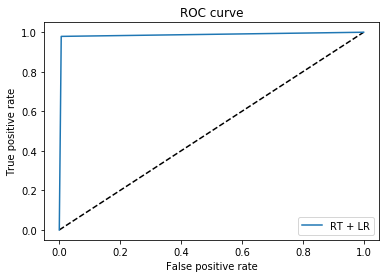

In [149]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [150]:
roc_auc_score(y_test1, rfc.predict(X_test1))

0.9863504739064434